In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("E:\\TechnoLabs\\Assign1\\Train.csv")

In [3]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


# Data Preperation

Evaluating Missing data

In [5]:
# It makes sense to drop Item_Identifier column as there is nothing really of value (coefficient that we can apply)
# df = df.drop("Item_Identifier", axis = 1)

In [6]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [7]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [8]:
# precentage of what is missing from Item_weight
def percent_missing(df):
    percent_nan = 100 * df.isna().sum() / len(df)
    percent_nan = percent_nan[percent_nan > 0].sort_values()
    
    return percent_nan

In [9]:
percent_nan = percent_missing(df)
print("Percentages of my missing data:")
print(round(percent_nan, 2))

Percentages of my missing data:
Item_Weight    17.17
Outlet_Size    28.28
dtype: float64


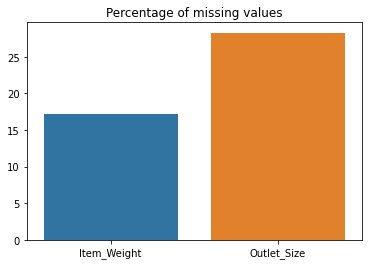

In [10]:
sns.barplot(x = percent_nan.index, y = percent_nan)
plt.title("Percentage of missing values")

plt.show()

Here, the percentage of missing data are huge so removing rows will result in loss of data.

### Feature Considerations based on missing values

Let's check with ***Outlet_Size***

In [11]:
df["Outlet_Size"].describe()

count       6113
unique         3
top       Medium
freq        2793
Name: Outlet_Size, dtype: object

In [12]:
df["Outlet_Size"].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


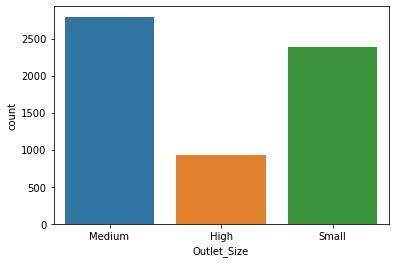

In [13]:
sns.countplot(df["Outlet_Size"]);

It seems feasible to drop the colum itself as it is missing almost 30% of its information

In [14]:
df = df.drop("Outlet_Size", axis = 1)

In [15]:
def percent_missing(df):
    percent_nan = 100 * df.isna().sum() / len(df)
    percent_nan = percent_nan[percent_nan > 0].sort_values()
    
    return percent_nan

In [16]:
percent_nan = percent_missing(df)
print("Percentages of my missing data:")
print(round(percent_nan, 2))

Percentages of my missing data:
Item_Weight    17.17
dtype: float64


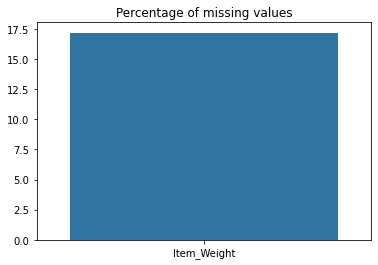

In [17]:
sns.barplot(x = percent_nan.index, y = percent_nan)
plt.title("Percentage of missing values")

plt.show()

In [18]:
df["Item_Weight"].describe()

count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
25%         8.773750
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64

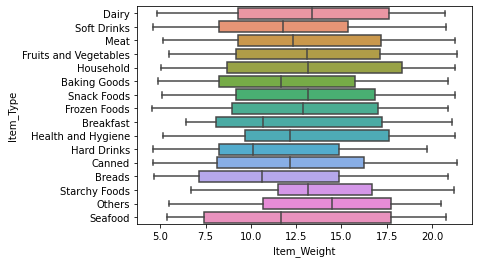

In [19]:
sns.boxplot(x = "Item_Weight", y = "Item_Type", data = df,
           orient = "h" );

In [20]:
df.groupby("Item_Type")["Item_Weight"].mean()

Item_Type
Baking Goods             12.277108
Breads                   11.346936
Breakfast                12.768202
Canned                   12.305705
Dairy                    13.426069
Frozen Foods             12.867061
Fruits and Vegetables    13.224769
Hard Drinks              11.400328
Health and Hygiene       13.142314
Household                13.384736
Meat                     12.817344
Others                   13.853285
Seafood                  12.552843
Snack Foods              12.987880
Soft Drinks              11.847460
Starchy Foods            13.690731
Name: Item_Weight, dtype: float64

Based on the chart above we can fill the missing value in ***Item_Weight*** with the mean value for its particular item

In [21]:
# for Item_Weight missing we will fill it with the mean value for that particular Item_Type
df["Item_Weight"] = df.groupby("Item_Type")["Item_Weight"].transform(lambda value: value.fillna(value.mean()))

In [22]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

We don't have any missing data anymore.

# Exploring Categorical Data

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Location_Type       8523 non-null   object 
 9   Outlet_Type                8523 non-null   object 
 10  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 732.6+ KB


In [24]:
df.select_dtypes(include = "object")

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,Tier 1,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,Tier 3,Supermarket Type2
2,FDN15,Low Fat,Meat,OUT049,Tier 1,Supermarket Type1
3,FDX07,Regular,Fruits and Vegetables,OUT010,Tier 3,Grocery Store
4,NCD19,Low Fat,Household,OUT013,Tier 3,Supermarket Type1
...,...,...,...,...,...,...
8518,FDF22,Low Fat,Snack Foods,OUT013,Tier 3,Supermarket Type1
8519,FDS36,Regular,Baking Goods,OUT045,Tier 2,Supermarket Type1
8520,NCJ29,Low Fat,Health and Hygiene,OUT035,Tier 2,Supermarket Type1
8521,FDN46,Regular,Snack Foods,OUT018,Tier 3,Supermarket Type2


In [25]:
df["Item_Fat_Content"].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [26]:
df["Item_Type"].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [27]:
df["Outlet_Identifier"].value_counts()

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [28]:
df["Outlet_Location_Type"].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [29]:
df["Outlet_Type"].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

Breaking the dataframe into two parts:

In [30]:
my_object_df = df.select_dtypes(include = "object")

In [31]:
my_numeric_df = df.select_dtypes(exclude = "object")

In [32]:
# my_numeric_df

In [33]:
# editing the string features
df_objects_dummies = pd.get_dummies(my_object_df, drop_first = True)

In [34]:
df_objects_dummies
# even though there are many columns, later we will use regularixation process to check any of these columns are significant

,Item_Identifier_DRA24,Item_Identifier_DRA59,Item_Identifier_DRB01,Item_Identifier_DRB13,Item_Identifier_DRB24,Item_Identifier_DRB25,Item_Identifier_DRB48,Item_Identifier_DRC01,Item_Identifier_DRC12,Item_Identifier_DRC13,...,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
8519,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,1,0,0
8520,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,1,0,0
8521,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0


In [35]:
# joining result
final_df = pd.concat([my_numeric_df, df_objects_dummies], axis = 1)

In [36]:
final_df

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Identifier_DRA24,Item_Identifier_DRA59,Item_Identifier_DRB01,Item_Identifier_DRB13,Item_Identifier_DRB24,...,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.300,0.016047,249.8092,1999,3735.1380,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
1,5.920,0.019278,48.2692,2009,443.4228,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
2,17.500,0.016760,141.6180,1999,2097.2700,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
3,19.200,0.000000,182.0950,1998,732.3800,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,8.930,0.000000,53.8614,1987,994.7052,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0.056783,214.5218,1987,2778.3834,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
8519,8.380,0.046982,108.1570,2002,549.2850,0,0,0,0,0,...,0,0,1,0,0,1,0,1,0,0
8520,10.600,0.035186,85.1224,2004,1193.1136,0,0,0,0,0,...,0,1,0,0,0,1,0,1,0,0
8521,7.210,0.145221,103.1332,2009,1845.5976,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0


In [37]:
X = final_df.drop("Item_Outlet_Sales", axis = 1)
y = final_df["Item_Outlet_Sales"]

# Polynomial Conversion

In [38]:
# from sklearn.preprocessing import PolynomialFeatures

In [39]:
# poly_converter = PolynomialFeatures(degree = 3, include_bias = False)

In [40]:
# poly_features = poly_converter.fit_transform(X)

# Train_Test_Split

In [41]:
from sklearn.model_selection import train_test_split

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 101)

In [44]:
X_train.shape

(5966, 1595)

# Features Scaling with StandardScaler

In [45]:
from sklearn.preprocessing import StandardScaler

In [46]:
scaler = StandardScaler()

In [47]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Linear Regression

In [84]:
from sklearn.linear_model import LinearRegression

In [85]:
lr_model = LinearRegression()

In [86]:
lr_model.fit(X_train,y_train)

LinearRegression()

In [87]:
y_pred = lr_model.predict(X_test)

In [88]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [91]:
MAE = mean_absolute_error(y_test, y_pred)
MAE

206764677953383.22

In [92]:
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
RMSE

2765246014728240.5

In [93]:
r2_score(y_test, test_predictions)

0.5592311167782542

# Regularization with Ridge Regression

In [48]:
from sklearn.linear_model import Ridge

In [49]:
ridge_model = Ridge(alpha = 10)

In [50]:
ridge_model.fit(X_train, y_train)

Ridge(alpha=10)

In [51]:
test_predictions = ridge_model.predict(X_test)

In [52]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [53]:
MAE = mean_absolute_error(y_test, test_predictions)
MAE

967.6646194491697

In [54]:
RMSE = np.sqrt(mean_squared_error(y_test, test_predictions))
RMSE

1284.88356433413

In [55]:
r2_score(y_test, test_predictions)

0.38549940906440594

# Ridge with Cross Validation

In [56]:
from sklearn.linear_model import RidgeCV

In [57]:
ridge_cv_model = RidgeCV(alphas=(0.1, 1.0, 10.0), scoring ='neg_mean_squared_error')

In [58]:
ridge_cv_model.fit(X_train, y_train)

RidgeCV(scoring='neg_mean_squared_error')

In [59]:
test_predictions = ridge_cv_model.predict(X_test)

In [60]:
MAE = mean_absolute_error(y_test, test_predictions)
MAE

967.6646194491155

In [61]:
RMSE = np.sqrt(mean_squared_error(y_test, test_predictions))
RMSE

1284.8835643340622

In [62]:
r2_score(y_test, test_predictions)

0.3854994090644708

In [63]:
ridge_cv_model.alpha_

10.0

In [64]:
ridge_cv_model.coef_

array([ -9.14471682, -15.29954433, 491.24085816, ..., 493.39910916,
       281.72676211, 510.89486718])

# Regularization with Lasso Regression

In [65]:
from sklearn.linear_model import LassoCV

In [66]:
lasso_model = LassoCV(eps=0.01, n_alphas=100, cv= 5)

In [67]:
lasso_model.fit(X_train,y_train)

LassoCV(cv=5, eps=0.01)

In [68]:
test_predictions = lasso_model.predict(X_test)

In [69]:
MAE = mean_absolute_error(y_test, test_predictions)
MAE

814.850849731396

In [70]:
RMSE = np.sqrt(mean_squared_error(y_test, test_predictions))
RMSE

1088.1984050287447

In [72]:
r2_score(y_test, test_predictions)

0.5592311167782542

# Elastic Net

In [73]:
from sklearn.linear_model import ElasticNetCV

In [74]:
elastic_model = ElasticNetCV(l1_ratio = [.1, .5, .7, .9, .95, .99, 1], eps=0.001, n_alphas=100, max_iter=1000000)

In [75]:
elastic_model.fit(X_train,y_train)

ElasticNetCV(l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1], max_iter=1000000)

In [76]:
elastic_model.l1_ratio_

1.0

In [77]:
elastic_model.alpha_

39.63065275344432

In [78]:
test_predictions = elastic_model.predict(X_test)

In [79]:
MAE = mean_absolute_error(y_test, test_predictions)
MAE

814.850849731396

In [80]:
RMSE = np.sqrt(mean_squared_error(y_test, test_predictions))
RMSE

1088.1984050287447

In [81]:
r2_score(y_test, test_predictions)

0.5592311167782542

#### We were able to bring RMSE from 1284 to 1088 with R-Squared from 38% to 55%.

# Random Forest

In [94]:
from sklearn.ensemble import RandomForestRegressor

In [95]:
rf_model = RandomForestRegressor(random_state=1)

In [96]:
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=1)

In [97]:
rf_pred = rf_model.predict(X_test)

In [98]:
MAE = mean_absolute_error(y_test, rf_pred)
MAE

767.1778273914745

In [99]:
RMSE = np.sqrt(mean_squared_error(y_test, rf_pred))
RMSE

1087.8300398067863

In [100]:
r2_score(y_test, rf_pred)

0.5595294749561467

# Building first model with Gradient Boosting

In [103]:
pip install xgboost

In [104]:
from xgboost import XGBRegressor

In [105]:
xg_model = XGBRegressor(random_state = 1)

In [106]:
xg_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=1, ...)

In [107]:
xg_pred = xg_model.predict(X_test)

In [108]:
MAE = mean_absolute_error(y_test, xg_pred)
MAE

753.6188004085178

In [109]:
RMSE = np.sqrt(mean_squared_error(y_test, xg_pred))
RMSE

1065.344052012627

In [110]:
r2_score(y_test, xg_pred)

0.5775507648661833

With XGBRegressor we were able to increase lower the ***RMSE from 1087.83 to 1065.34*** with R-Squared from ***55% to 57%*** 

# Improving XGBooster

In [112]:
xg_model2 = XGBRegressor(n_estimators = 1000, learning_rate = 0.05)

In [114]:
xg_model2.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [115]:
xg_pred2 = xg_model2.predict(X_test)

In [116]:
MAE = mean_absolute_error(y_test, xg_pred2)
MAE

763.8111684948661

In [117]:
RMSE = np.sqrt(mean_squared_error(y_test, xg_pred2))
RMSE

1087.2219445770797

In [118]:
r2_score(y_test, xg_pred2)

0.5600217819379378